In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [31]:
class multivarTHETA:
    
    def __init__(self,lr = 0.1, iters = 10):
        self.lr =lr
        self.iters = iters
        
    def fit(self,X,y):
        
        X = np.hstack([np.ones([X.shape[0],1]),X])
        self.theta_ = np.random.randn(X.shape[1],1)
        errors = []
        for i in range(self.iters):
            errors.append(self.gradient_desc(X,y))
            
        return errors
        
        
    def gradient_desc(self,X,y):
        delta_theta,errors = self.gradient(X,y)
        
        self.theta_+=delta_theta
        return errors
    
    def gradient(self,X,y):
        yh = self.hypo(X)
        ya = y.reshape(-1,1)
        
        mse = np.mean((yh-ya)**2)
        dmsedt = np.dot(X.T,(yh-ya))/len(X)
        
        return -dmsedt*self.lr , mse
    
    def hypo(self,X):
        return np.dot(X,self.theta_)
    
    def predict(self,X):
        ones = np.ones([X.shape[0], 1])
        X = np.hstack([ones, X])
        return self.hypo(X).flatten()

In [32]:
X,y = make_regression(n_samples=1000,n_features=1,bias=230,noise=30,random_state=100)

In [39]:
model = multivarTHETA(lr=1,iters=10)
errors = model.fit(X,y)

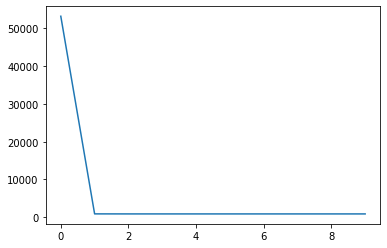

In [40]:
plt.plot(errors)